# -최근접이웃(KNN)-이진분류
- citrus dataset
- 귤과 오렌지를 구분할 데이터 셋


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.데이터 준비

In [37]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv

--2023-11-22 14:00:01--  https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv.1’

citrus.csv.1        100%[===================>] 301.07K  --.-KB/s    in 0.006s  

2023-11-22 14:00:02 (48.4 MB/s) - ‘citrus.csv.1’ saved [308294/308294]



In [38]:
#데이터 로딩
citrus=pd.read_csv('citrus.csv')
print(type(citrus))
citrus.shape

<class 'pandas.core.frame.DataFrame'>


(10000, 6)

In [39]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 2.데이터 탐색

In [40]:
df= citrus.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [41]:
df.describe().T               #.T 붙이면 행과 열이 바뀜  , 최솟값,최댓갓,제목 정도 봄

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


In [42]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

<Axes: xlabel='name', ylabel='count'>

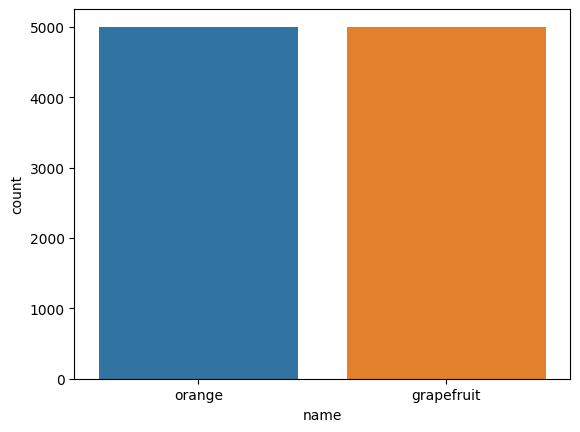

In [43]:
sns.countplot(data=df,x='name')

- 결측치 수 확인

In [44]:
df.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [45]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 3.테스트 데이터

In [46]:
# X:입력,Y:출력
# 1.필요없는 피쳐를 드랍 시키는 방법 2.필요한 피처를 읽어오는 방법
X= df.drop('name',axis=1)
X.head()

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [47]:
Y=df['name']
Y.head()

0    orange
1    orange
2    orange
3    orange
4    orange
Name: name, dtype: object

In [48]:
#테스트 데이터를 20% 분리
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [49]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [50]:
type(Y_train)

pandas.core.series.Series

In [51]:
type(X_train)

pandas.core.frame.DataFrame

In [52]:
# 해야할일 Y 인코딩, X 스케일링

## 4.데이터 전처리

### 스케일링
- 스케일링과 레이블 인코딩 등의 전처리는 테스트 데이터를 포함하면 안된다

In [53]:
from sklearn.preprocessing import StandardScaler
# 1.객체 만들기
# 2. 피팅 fit이라는 함수 씀
# 3. 데이터 변환 transform 이라는 함수 씀

ss =StandardScaler()
ss.fit(X_train)                            # 트레인이랑 테스트 엑스 분리하고 스케일링을 해야함 (트레인만 스케일링 되도록) --- 레이블인코딩도 마찬가지
X_train_s=ss.transform(X_train)               # X_train_s 는 넘파이 어레이 형태임

In [54]:
X_train_s[:5]         # 넘파이 어레이라 head() 불가

array([[ 0.71967761,  0.73509854, -0.65464813,  0.25140067,  1.06536065],
       [ 1.44178079,  1.45937606, -0.55888333,  0.42245062,  0.95479015],
       [-0.60161758, -0.59974392, -0.17582416,  0.67902555, -1.03547897],
       [-0.17654975, -0.24084921, -3.14453275, -0.94594901,  2.17106572],
       [-1.7129395 , -1.69589237, -0.08005937, -0.17622421, -0.70376745]])

###레이블 인코딩

In [55]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)        #다시 쓸일 없어서 앞에 X처럼 _s 안만들고 덮어 씀

In [56]:
Y_train[:5]

array([0, 0, 1, 0, 1])

In [57]:
le.classes_        # 걍 0,1 확인해보는거

array(['grapefruit', 'orange'], dtype=object)

In [58]:
type(X_train_s), type(Y_train)        # 전처리가 끝나면 다 넘파이 어레이 형태인지 확인 해봄. 다 넘파이 어레이로 넣기 위해(강사님 스타일)

(numpy.ndarray, numpy.ndarray)

##5.학습
- 베이스라인 학습

In [59]:
from sklearn.neighbors import KNeighborsClassifier
# 1.객체 만들기
# 2. 학습 fit()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s,Y_train)

KNeighborsClassifier()

##6.평가

- 가장 간단한 방법

In [60]:
#테스트 데이터 전처리 ( 트레인 할때 사용했던 평균과 표준편차 그대로 사용)
X_test_s=ss.transform(X_test)
le.fit(Y_test)
Y_test=le.transform(Y_test)

In [61]:
clf.score(X_test_s,Y_test)              # 정확도 나타냄

0.9145

- 메트릭스 함수 사용해서 평가

In [62]:
from sklearn.metrics import accuracy_score,recall_score, precision_score             # metrics 안에 평가하는 함수들이 많이 있음

Y_pred =clf.predict(X_test_s)   # 예측값

#평가
acc= accuracy_score(Y_test,Y_pred)
re= recall_score(Y_test,Y_pred)
pr= precision_score(Y_test,Y_pred)
print('정확도:',acc)
print('재현율:',re)
print('정밀도:',pr)                             # 베이스라인의 평가(뭔가 튜닝하기전 평가)

정확도: 0.9145
재현율: 0.9109311740890689
정밀도: 0.9155645981688708


- 혼동(오차) 행렬

In [63]:
from sklearn.metrics import confusion_matrix

cfm= confusion_matrix(Y_test, Y_pred)
cfm

array([[929,  83],
       [ 88, 900]])

[Text(0.5, 23.52222222222222, 'Prediction'),
 Text(50.722222222222214, 0.5, 'Actual')]

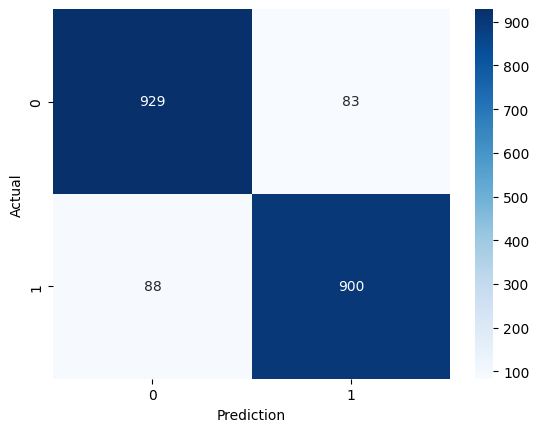

In [64]:
s=sns.heatmap(cfm, annot=True,cmap="Blues",fmt='d')          # fmt='d'는 십진수로 해달라는 말
s.set(xlabel= 'Prediction',ylabel="Actual")

##7.튜닝

In [65]:
values=[]

for k in range(1,30):
  clf= KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train_s, Y_train)
  acc=clf.score(X_test_s,Y_test)
  values.append(acc)

In [66]:
values

[0.8965,
 0.8965,
 0.9135,
 0.913,
 0.9145,
 0.912,
 0.9135,
 0.9125,
 0.913,
 0.9135,
 0.9155,
 0.9165,
 0.915,
 0.918,
 0.916,
 0.917,
 0.916,
 0.919,
 0.918,
 0.916,
 0.9165,
 0.918,
 0.918,
 0.917,
 0.916,
 0.9135,
 0.9165,
 0.9155,
 0.916]

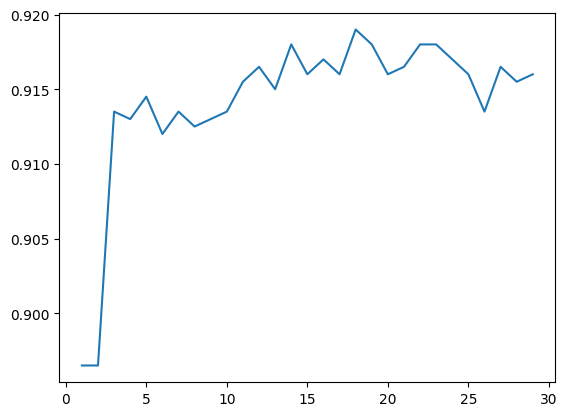

In [67]:
plt.plot(np.arange(1,30),values)
plt.show()

k=15 일 경우 베스트

##8.최종모델 학습


In [68]:
clf= KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train_s, Y_train)

KNeighborsClassifier(n_neighbors=15)

In [69]:
#최종테스트
acc=clf.score(X_test_s,Y_test)
acc

0.916